<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  KNN (K-Nearest-Neighbors) </h2> 

---

# Aspectos teóricos

## Introducción

**KNN** o **K vecinos cercanos** es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. Es un algoritmo:

**Supervisado:** Quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada “una fila” de datos.

**Basado en Instancia:** Esto quiere decir que el algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como “base de conocimiento” para la fase de predicción.

Como **pros** tiene sobre todo que es sencillo de aprender e implementar. Tiene como **contras** que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). Por estas razones KNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features.

## Algoritmo

1. Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
2. Seleccionar los $k$ elementos más cercanos (con menor distancia, según la métrica que se use)
3. Realizar una “votación de mayoría” entre los $k$ puntos: los de una clase/etiqueta que predominen decidirán su clasificación final.

Teniendo en cuenta el punto 3, veremos que para decidir la clase de un punto es muy importante el valor de $k$, pues este terminará casi por definir a qué grupo pertenecerán los puntos, sobre todo en las fronteras entre grupos. Por ejemplo -y a priori- es conveniente elegir valores impares de $k$ de manerar que siempre se garantice que no haya empates (si las características que utilizamos son pares). No será lo mismo tomar para decidir 3 valores que 13. Esto no quiere decir que necesariamente tomar más puntos implique mejorar la precisión. Lo que es seguro es que cuantos más puntos k, más tardará nuestro algoritmo en procesar y darnos respuesta.

<img align="center" src="imagenes/knn.png"  width="300" height="300">

Las formas más populares de medir la cercanía entre puntos son la distancia Euclidiana o la Similitud Coseno (mide el ángulo de  los vectores, cuanto menores, serán similares). 

# Práctica

## Importamos las librerías 

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

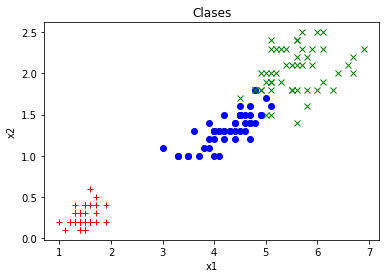

In [13]:
plt.plot(X[y==0,0],X[y==0,1],'r+')
plt.plot(X[y==1,0],X[y==1,1],'bo')
plt.plot(X[y==2,0],X[y==2,1],'gx')
plt.title('Clases')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [25]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [35]:
def plot_decision_regions(X, y, classifier):
    h = .02 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
    np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

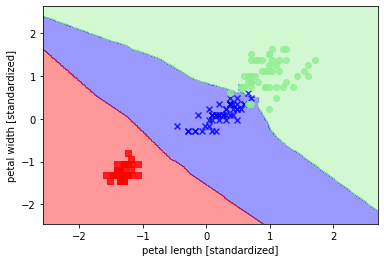

In [38]:
plot_decision_regions(X_combined_std, y_combined,classifier=knn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()